<a href="https://colab.research.google.com/github/Gholamrezadar/Colab-notebooks/blob/main/NLP_tamrin_2B_gholamrezadar_96405037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP Tamrin 2-B

Gholamrezadar Nov 2020


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports

In [ ]:
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import time

### Loading Data

In [ ]:

_path = "/content/drive/My Drive/Colab Notebooks/NLP Tamrins/pima-indians-diabetes.csv"
data = np.loadtxt(_path,delimiter=',')
df = pd.DataFrame(data=data)
df.head()

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


### Data preprocessing

In [ ]:
# complete dataset
X = data[:,0:8]
Y = data[:,8]

# split ratios
train_split = 0.7
test_split = 0.3

# train data
x_train = X[:int(len(X)*train_split)]
y_train = Y[:int(len(Y)*train_split)]

# test data
x_test = X[int(len(X)*train_split):]
y_test = Y[int(len(Y)*train_split):]

print("length of data  : {}".format(len(X)))
print("length of train : {}".format(len(x_train)))
print("length of test  : {}".format(len(x_test)))


length of data  : 768
length of train : 537
length of test  : 231


### Defining Model

Model: "diabetes_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_45 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


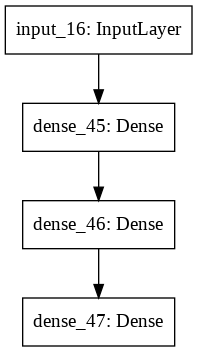

In [ ]:
inputs = keras.Input(shape=(8,))
x = Dense(12,activation='relu')(inputs)
x = Dense(8,activation='relu')(x)
outputs = Dense(1,activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="diabetes_model")

model.summary()
keras.utils.plot_model(model, "diabetes_model.png")

### Training

In [ ]:
model.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'],
)
a = time.time()
history = model.fit(x_train, y_train, batch_size=10, epochs=200, validation_split=0.2)
print("took " + str(time.time()-a) + " seconds")

Epoch 1/200
43/43 [==============================] - 0s 4ms/step - loss: 7.9011 - accuracy: 0.4033 - val_loss: 3.2774 - val_accuracy: 0.4722
Epoch 2/200
43/43 [==============================] - 0s 1ms/step - loss: 3.1153 - accuracy: 0.5128 - val_loss: 1.6587 - val_accuracy: 0.4815
Epoch 3/200
43/43 [==============================] - 0s 2ms/step - loss: 1.7160 - accuracy: 0.5501 - val_loss: 1.0389 - val_accuracy: 0.6667
Epoch 4/200
43/43 [==============================] - 0s 2ms/step - loss: 1.1293 - accuracy: 0.5804 - val_loss: 0.8548 - val_accuracy: 0.6667
Epoch 5/200
43/43 [==============================] - 0s 2ms/step - loss: 0.8911 - accuracy: 0.5967 - val_loss: 0.7859 - val_accuracy: 0.6574
Epoch 6/200
43/43 [==============================] - 0s 1ms/step - loss: 0.8144 - accuracy: 0.5874 - val_loss: 0.7115 - val_accuracy: 0.6667
Epoch 7/200
43/43 [==============================] - 0s 1ms/step - loss: 0.7332 - accuracy: 0.6131 - val_loss: 0.6701 - val_accuracy: 0.6667
Epoch 8/200
4

### Evaluation

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)

print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

8/8 - 0s - loss: 0.6155 - accuracy: 0.7273
Test loss: 0.6155065298080444
Test accuracy: 0.7272727489471436


#### Plotting History

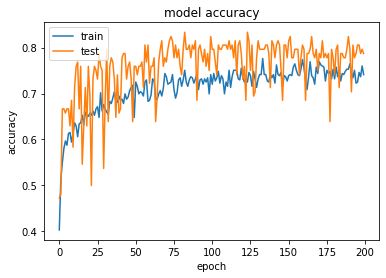

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()